In [1]:
import numpy as np
import matplotlib.pyplot as plt

from twopbvp import two_p_BVP, get_f_vec
from beam import Beam
from sturmliouville import SL_solve

In [ ]:
N = 100
L = 1
alpha = np.e**(-1/4)
beta = np.e**(-1/4)
f = lambda x: np.exp(-(x - 1/2)**2) * (4*(x - 1/2)**2 - 2)
x, y = two_p_BVP(*get_f_vec(f, L, N), alpha, beta)
g = lambda x: np.exp(-(x - 1/2)**2)
plt.plot(x, y)
plt.plot(x, g(x))
plt.show()

# Task 1.2

In [ ]:
I = lambda x, L: 10**(-3) * (3 - 2 * np.cos(np.pi * x / L)**12) # m4
q = lambda x: -50 * 10**3 # N/m
L = 10 # m
E = 1.9 * 10**11 # N/m2
N = 999
beam = Beam(q, L, E, I)
x, u = beam.solve(N)

In [ ]:
plt.plot(u, x)

In [ ]:
np.round(u[500], 8)

# Task 2.1

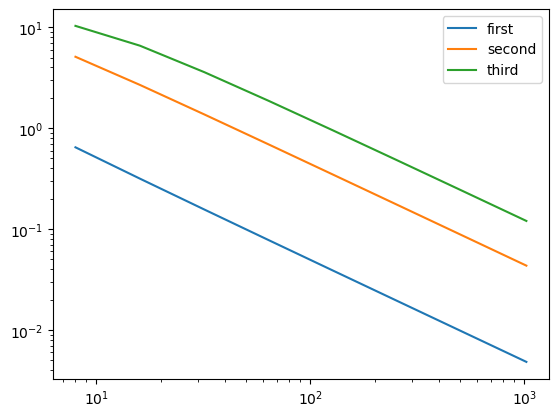

In [8]:
error1 = np.empty([8])
error2 = np.empty([8])
error3 = np.empty([8])

true_eig = lambda n: -(np.pi**2 / 4 + np.pi**2 * n + np.pi**2 * n**2)

true1 = true_eig(0)
true2 = true_eig(1)
true3 = true_eig(2)

for i in range(3,11):
    x, v, w = SL_solve(1, 2**i)
    error1[i - 3] = np.abs(true1 - w[0])
    error2[i - 3] = np.abs(true2 - w[1])
    error3[i - 3] = np.abs(true3 - w[2])

    
N = np.array([2**i for i in range(3,11)])
    
plt.loglog(N, error1)
plt.loglog(N, error2)
plt.loglog(N, error3)
plt.legend(['first', 'second', 'third'])

In [6]:
x, v, w = SL_solve(1, 499)
w = -np.abs(w)
np.round(w, 8)

array([ -2.47729835, -22.29553783, -61.93123128])

[ -2.51694411+0.j -22.64877103+0.j -62.89255718+0.j]


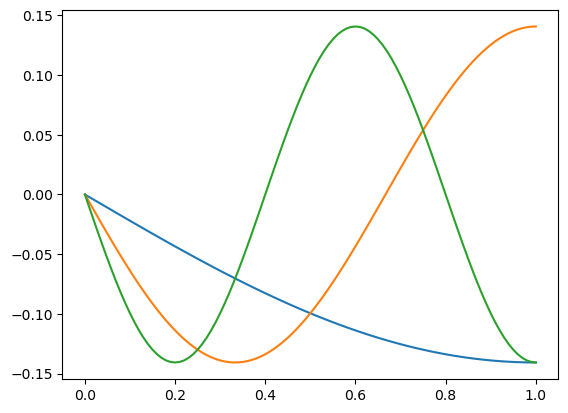

In [7]:
x, v, w = SL_solve(1, 100)

print(w)
plt.plot(x, v[:,0])
plt.plot(x, v[:,1])
plt.plot(x, v[:,2])
plt.show()

# Task 2.2